
## Fashion MNIST : 의류 클래스 예측
이미지를 분석하여 의류 클래스를 분류 해보세요.
### 1. train.csv / test.csv
- index index
- label 의류의 범주(0~9)
- pixel(1~784) 이미지의 각 픽셀값(28×28=784)  

### 2.  submission.csv (제출 파일 형식)  

### 3. 라벨 종류
- 0 : T-shirt/top
- 1 : Trouser
- 2 : Pullover
- 3 : Dress
- 4 : Coat
- 5 : Sandal
- 6 : Shirt
- 7 : Sneaker
- 8 : Bag
- 9 : Ankle boot

#### `1.` 라이브러리 임포트

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # 학습셋과 테스트셋을 나누기 위한 함수입니다.
import tensorflow as tf
from tensorflow import keras

#### `2.` 데이터 로드

In [2]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')
submission_data = pd.read_csv('./data/sample_submission.csv')

#### `3-1.` 데이터 확인: 정보 확인

In [3]:
display(train_data.head())
print('----------train_data.info()----------')
print(train_data.info())
display(test_data.head())
print('----------test_data.info()----------')
print(test_data.info())
display(submission_data.head())
print('----------submission_data.info()----------')
print(submission_data.info())

,index,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,6,0,0,0,0,0,0,0,5,...,0,0,0,30,43,0,0,0,0,0
3,3,0,0,0,0,1,2,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


----------train_data.info()----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 786 entries, index to pixel784
dtypes: int64(786)
memory usage: 359.8 MB
None


,index,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


----------test_data.info()----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, index to pixel784
dtypes: int64(785)
memory usage: 59.9 MB
None


,index,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


----------submission_data.info()----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   index   10000 non-null  int64
 1   label   10000 non-null  int64
dtypes: int64(2)
memory usage: 156.4 KB
None


#### `3-2.` 데이터 확인: 시각화

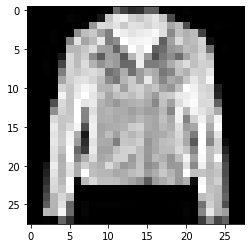

In [4]:
# train_data의 피처 데이터는 이미지의 각 픽셀을 데이터프레임화 시킨것으로 이미지로 시각화 하기 위해선 데이터를 픽셀화
# 시킬 필요가 있습니다. 이미지의 각 픽셀 값은 28*28=784이기 때문에 데이터도 28샘플의 28특성으로 바꿔주어야 합니다.
# 데이터의 차원을 변환하기 위해 넘파이 배열로 받겠습니다. 또한 피쳐의 0번째와 1번째는 인덱스값으로 2번째 컬럼 데이터
# 부터 가져옵니다.
plt.imshow(np.array(train_data.iloc[23, 2:]) # 23행에 2번째부터 끝까지의 컬럼 데이터를 반환합니다.
           .reshape(28, 28),                 # 데이터의 형태를 x28*y28로 변환합니다.
           cmap='gray')                      # 이미지 출력 색상을 회색으로 지정합니다.
plt.show()                                   # 출력합니다.

#### `4.` 데이터 분할: training set와  validation set 나누기

In [5]:
# training set와 validation set를 나누기 위해 feature와 target데이터를 분리하겠습니다.
feature_data = train_data.copy().drop(['index', 'label'], axis=1)
target_data = train_data['label'].copy()

# training set(x_train, y_train)와 validation set(x_test, y_test)를 나눕니다.
x_train, x_test, y_train, y_test = train_test_split(feature_data,         # 나누고자 하는 feature데이터를 지정합니다.
                                                    target_data,          # 나누고자 하는 target데이터를 지정합니다.
                                                    test_size=0.3,        # 전체 데이터의 30%를 validation set로 구성합니다.
                                                    random_state=23,      # seed 값을 지정합니다.
                                                    shuffle=True,         # 데이터를 섞을지 말지 여부를 지정합니다.
                                                    stratify=target_data) # target데이터가 한쪽에 편향되지 않게 일정한 비율로 나누어줍니다.

# 나누어진 데이터의 크기를 확인합니다.
print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)
print('x_test.shape:', x_test.shape)
print('y_test.shape:', y_test.shape)

x_train.shape: (42000, 784)
y_train.shape: (42000,)
x_test.shape: (18000, 784)
y_test.shape: (18000,)


#### `5.` 데이터 전처리: 데이터 정규화

In [ ]:
# 이미지의 
https://itstory1592.tistory.com/21
    https://dacon.io/competitions/open/235594/codeshare/2869?page=1&dtype=recent